In [9]:
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

In [2]:
testCSR = CSR2D(input_file= 'input/config.yaml')

start reinterpolation. number of slice 1
Re-interpolation finished!


In [3]:
df = testCSR.DF_tracker.density_x_interp[-1]
xgrid_interp = testCSR.DF_tracker.x_grid_interp
zgrid_interp = testCSR.DF_tracker.z_grid_interp
X,Z = np.meshgrid(xgrid_interp, zgrid_interp)

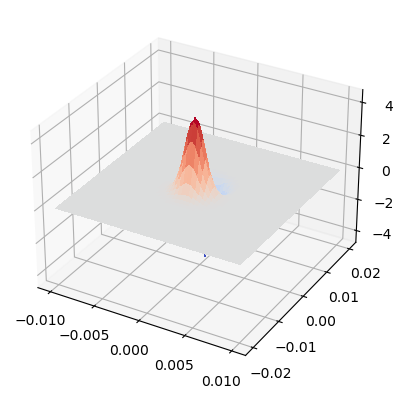

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Z, df,
                       linewidth=0, antialiased=False, cmap=cm.coolwarm)

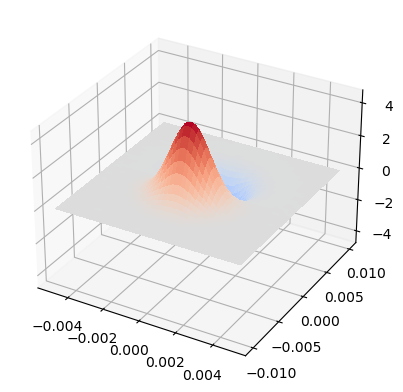

In [5]:
df = testCSR.DF_tracker.density_x
xgrid_interp = testCSR.DF_tracker.x_grids
zgrid_interp = testCSR.DF_tracker.z_grids
X,Z = np.meshgrid(xgrid_interp, zgrid_interp)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Z, df,
                       linewidth=0, antialiased=False, cmap=cm.coolwarm)

In [ ]:
testCSR.run()

## Plot output

Keys: <KeysViewHDF5 ['step_1', 'step_10', 'step_11', 'step_12', 'step_13', 'step_14', 'step_15', 'step_2', 'step_3', 'step_4', 'step_5', 'step_6', 'step_7', 'step_8', 'step_9']>
Keys: <KeysViewHDF5 ['x_grids', 'xkicks', 'z_grids']>
(20, 20)


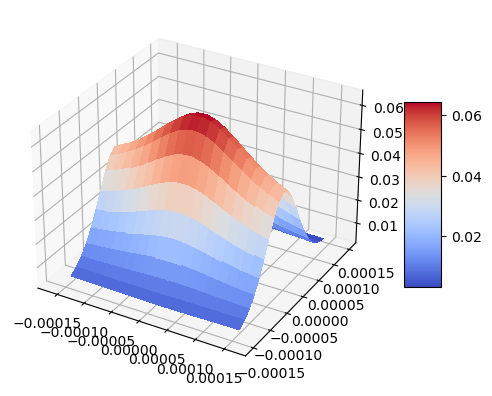

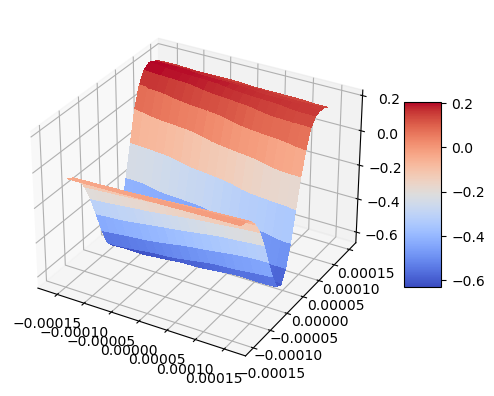

In [28]:
filename = "output/test-2023-04-22T15_23_18-07_00-wakes.h5"

with h5py.File(filename, "r") as f:
     step = 'step_13'
     print("Keys: %s" % f.keys())
     dE_dct = np.array(f[step]['longitudinal']['dE_dct'])
     x_grids = np.array(f[step]['longitudinal']['x_grids']).reshape(dE_dct.shape)
     z_grids = np.array(f[step]['longitudinal']['z_grids']).reshape(dE_dct.shape)

     print("Keys: %s" % f[step]['transverse'].keys())
     xkicks = np.array(f[step]['transverse']['xkicks'])


     print(z_grids.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_grids, z_grids, xkicks, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_grids, z_grids, dE_dct, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [30]:
filename = "output/particles.h5"

with h5py.File(filename, "r") as f:
     step = 'step_2'
     print("Keys: %s" % f[step]['particles'].keys())
     x = np.array(f[step]['particles']['x'])
     y = np.array(f[step]['particles']['y'])
     xp = np.array(f[step]['particles']['xp'])
     yp = np.array(f[step]['particles']['yp'])
     z = np.array(f[step]['particles']['z'])
     delta = np.array(f[step]['particles']['delta'])

Keys: <KeysViewHDF5 ['delta', 'x', 'xp', 'y', 'yp', 'z']>


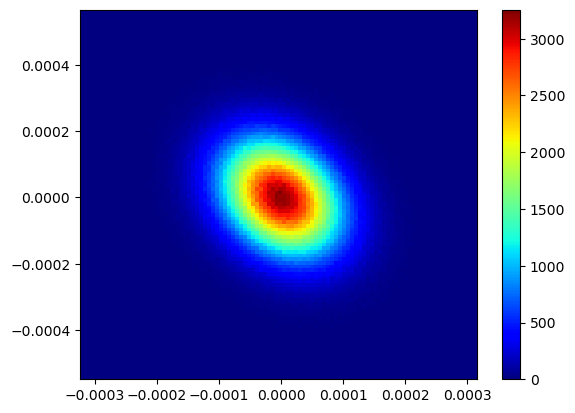

In [85]:
h,xedges,yedges,_ = plt.hist2d(x,z, bins = 100, cmap=plt.cm.jet)
plt.colorbar()

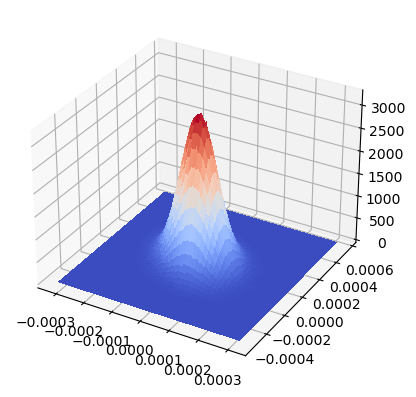

In [86]:
xedges = (xedges[1:] + xedges[:-1])/2
yedges = (yedges[1:] + yedges[:-1])/2
X, Z = np.meshgrid(xedges, yedges)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Z, h,
                       linewidth=0, antialiased=False, cmap=cm.coolwarm)

In [8]:
import h5py
from tools import full_path
filename = full_path("output/test-2023-04-22T14_47_36-07_00-statistics.h5")

with h5py.File(filename, "r") as f:
     print("Keys: %s" % f.keys())

Keys: <KeysViewHDF5 ['Cx', 'Cxp', 'R51', 'R52', 'R56', 'alphaX', 'alphaX_beam', 'alphaX_minus_dispersion', 'betaX', 'betaX_beam', 'betaX_minus_dispersion', 'etaX', 'etaXp', 'gemitX', 'gemitX_minus_dispersion', 'sigE', 'sigX', 'sigZ', 'step_positions']>
